In [1]:
import tweepy       # python wrapper for twitter api
import json
import time
import requests
# step 0, get your own twitter credentials!

In [2]:
# this is my own personal twitter api information
# if you could be so kind as to sign up yourself on both twitter and mashape that'd be great :)
# It's FREEEEEEE
api_key = 'g5uPIpw80nULQI1gfklv2zrh4'
api_secret = 'cOWvNWxYvPmEZ0ArZVeeVVvJu41QYHdUS2GpqIKtSQ1isd5PJy'
access_token = '49722956-TWl8J0aAS6KTdcbz3ppZ7NfqZEmrwmbsb9cYPNELG'
access_secret = '3eqrVssF3ppv23qyflyAto8wLEiYRA8sXEPSghuOJWTub'

In [3]:
# Documentation is your friend! http://docs.tweepy.org/en/v3.1.0/
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object

In [85]:
music_tweets = []

In [90]:
# 1. Use Twitter API to stream and store tweets (300 per candidate)
# 37.781157,-122.39872 is the lat,lng for SF
search = api.search(q='#music', count=800, geocode="37.781157,-122.398720,10mi")+api.search(q='#concert', count=800, geocode="37.781157,-122.398720,10mi")+api.search(q='#band', count=800, geocode="37.781157,-122.398720,10mi")
print len(search)
music_tweets.append(search)

176


In [91]:
len(music_tweets)

5

In [92]:
music_tweet = [item for sublist in music_tweets for item in sublist]

In [93]:
music_tweets = music_tweet
len(music_tweets)

880

In [94]:
music_tweets[0].text

u'Featured Artist #torilynn #top40 #music #twt247 https://t.co/JrUUeFgJ7Y #top40 #celebrity https://t.co/sATuOIDU7L'

In [95]:
# wrappers come with built in python attributes and methods!
print dir(music_tweets[0])

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [96]:
print music_tweets[0].created_at
print music_tweets[0].text
print music_tweets[0].favorite_count
print music_tweets[0].favorited
print music_tweets[0].lang
print music_tweets[0].geo
print music_tweets[0].retweet_count
print music_tweets[0].retweeted
print music_tweets[0].coordinates

2016-12-02 02:03:12
Featured Artist #torilynn #top40 #music #twt247 https://t.co/JrUUeFgJ7Y #top40 #celebrity https://t.co/sATuOIDU7L
0
False
en
None
0
False
None


In [97]:
# modify the tweets to make a nice dictionary
def parse_status_objects(tweet_list):
    modified_tweets = list()
    for x in tweet_list:
        modified_tweets.append( [
                    x.created_at,
                    x.text,
                    x.favorite_count,
                    x.favorited,
                    x.lang,
                    x.geo,
                    x.retweet_count,
                    x.retweeted,
                    x.coordinates
                ])
    return modified_tweets
        
music_tweets = parse_status_objects(music_tweets)

In [98]:
print music_tweets[0]

[datetime.datetime(2016, 12, 2, 2, 3, 12), u'Featured Artist #torilynn #top40 #music #twt247 https://t.co/JrUUeFgJ7Y #top40 #celebrity https://t.co/sATuOIDU7L', 0, False, u'en', None, 0, False, None]


In [99]:
type(music_tweets)

list

In [100]:
import pandas as pd
import numpy as np
# 2 Create a dataframe that combines all of the tweets from each candidate
# To do so, you will need to concat the data frames
# so each row is a tweet and your columns should be 
# date, text, favorite_count,favorited, language, geocode, retweet count, retweeted, coordinates
cols = ['date', 'text', 'favorite_count', 'favorited', 'language', 'geocode', 'retweet count', 'retweeted', 'coordinates']
music_df = pd.DataFrame(music_tweets, columns=cols)
music_df.head()

,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates
0,2016-12-02 02:03:12,Featured Artist #torilynn #top40 #music #twt24...,0,False,en,None,0,False,None
1,2016-12-02 02:01:26,S/T by The Smiths https://t.co/eAQ8dYK6sj #Mus...,0,False,en,None,0,False,None
2,2016-12-02 02:01:26,Once Upon a Time in the West by Ennio #Morrico...,0,False,en,None,0,False,None
3,2016-12-02 02:01:26,Miles Davis At Carnegie Hall by Miles Davis ht...,0,False,en,None,0,False,None
4,2016-12-02 01:44:36,Check out 🎤 https://t.co/Mctky0EXrl ☜ New rel...,0,False,en,None,0,False,None


In [101]:
from textblob import TextBlob, Word

# 3 Create a function to take in a string and output the textblob sentiment of that string
def create_sentiment(str):
    tb = TextBlob(str)
    return tb.sentiment.polarity

In [102]:
# 4 Add a column to your data frame called 'sentiment'
# which holds the sentiment of that tweet (hint: use the function from #3)
music_df['sentiment'] = music_df['text'].apply(lambda x: create_sentiment(x))
music_df.head()

,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,sentiment
0,2016-12-02 02:03:12,Featured Artist #torilynn #top40 #music #twt24...,0,False,en,None,0,False,None,0.000000
1,2016-12-02 02:01:26,S/T by The Smiths https://t.co/eAQ8dYK6sj #Mus...,0,False,en,None,0,False,None,-0.100000
2,2016-12-02 02:01:26,Once Upon a Time in the West by Ennio #Morrico...,0,False,en,None,0,False,None,0.000000
3,2016-12-02 02:01:26,Miles Davis At Carnegie Hall by Miles Davis ht...,0,False,en,None,0,False,None,0.000000
4,2016-12-02 01:44:36,Check out 🎤 https://t.co/Mctky0EXrl ☜ New rel...,0,False,en,None,0,False,None,0.136364


In [103]:
# 5 create a word count column, which holds the number of words in the text column
music_df['word_count'] = music_df['text'].apply(lambda x: len(x))
music_df.head()

,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,sentiment,word_count
0,2016-12-02 02:03:12,Featured Artist #torilynn #top40 #music #twt24...,0,False,en,None,0,False,None,0.000000,113
1,2016-12-02 02:01:26,S/T by The Smiths https://t.co/eAQ8dYK6sj #Mus...,0,False,en,None,0,False,None,-0.100000,105
2,2016-12-02 02:01:26,Once Upon a Time in the West by Ennio #Morrico...,0,False,en,None,0,False,None,0.000000,111
3,2016-12-02 02:01:26,Miles Davis At Carnegie Hall by Miles Davis ht...,0,False,en,None,0,False,None,0.000000,110
4,2016-12-02 01:44:36,Check out 🎤 https://t.co/Mctky0EXrl ☜ New rel...,0,False,en,None,0,False,None,0.136364,138


In [104]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# use countvectorizer to create a document-term matrix and concatinate it to your main dataframe
#(hint you should now have thousands of columns)
# Don't add count vectorizer result to the original dataframe
vect = TfidfVectorizer()
tfidf_df = pd.DataFrame(vect.fit_transform(music_df['text']).toarray(), columns=vect.get_feature_names())
tfidf_df.head()

,00,01,02,03,04,05,05ira8jwmk,06,07,08,...,z0ti2dyzfy,zbjokaviv9,zimuqjg3xt,znslqigq4m,zp5pq66lsy,zpylvbxt3p,zpzpncekqb,zsvbhqsspu,zu3qnhplss,zztbehmotq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
combined_df = pd.concat([music_df,tfidf_df])
combined_df.head()

,00,01,02,03,04,05,05ira8jwmk,06,07,08,...,z0ti2dyzfy,zbjokaviv9,zimuqjg3xt,znslqigq4m,zp5pq66lsy,zpylvbxt3p,zpzpncekqb,zsvbhqsspu,zu3qnhplss,zztbehmotq
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
vect = CountVectorizer()
count_df = pd.DataFrame(vect.fit_transform(music_df['text']).toarray(), columns=vect.get_feature_names())
count_df.head()

,00,01,02,03,04,05,05ira8jwmk,06,07,08,...,z0ti2dyzfy,zbjokaviv9,zimuqjg3xt,znslqigq4m,zp5pq66lsy,zpylvbxt3p,zpzpncekqb,zsvbhqsspu,zu3qnhplss,zztbehmotq
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
from sklearn.cluster import KMeans

# 6 Use kmean to create clusters for the dataframe of words only (choose an optimal k)
# Don't add clusters to the original dataframe yet
km = KMeans(n_clusters=3, random_state=1)
km.fit(tfidf_df)

from sklearn import metrics
metrics.silhouette_score(tfidf_df, km.labels_)

0.055589896464884103

In [108]:
k_range = range(2, 165)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(tfidf_df)
    scores.append(metrics.silhouette_score(tfidf_df, km.labels_))

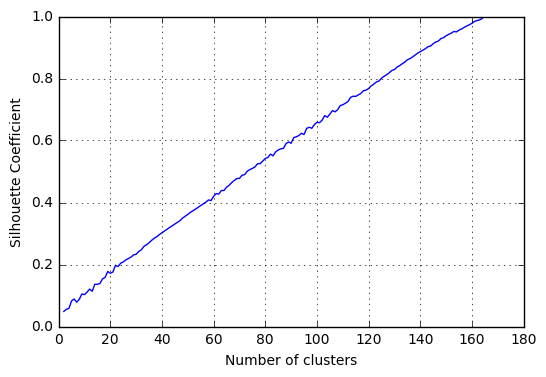

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [110]:
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(tfidf_df)
    scores.append(metrics.silhouette_score(tfidf_df, km.labels_))

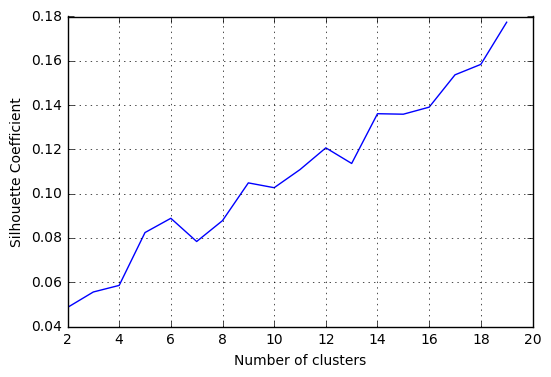

In [111]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [112]:
km = KMeans(n_clusters=4, random_state=1)
km.fit(tfidf_df)
print metrics.silhouette_score(tfidf_df, km.labels_)
km.labels_

0.0585594950236


array([0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 0, 0,
       2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2,
       2, 0, 0, 2, 1, 1, 1, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 1, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 3, 1, 1, 2, 3, 3, 2, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 0, 0, 2, 1, 1, 1, 2,
       3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 3, 2, 3, 2, 2,
       2, 3,

In [113]:
k_range = range(2, 100)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(count_df)
    scores.append(metrics.silhouette_score(count_df, km.labels_))

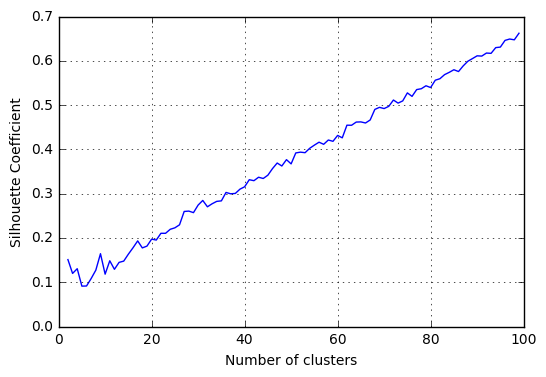

In [114]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

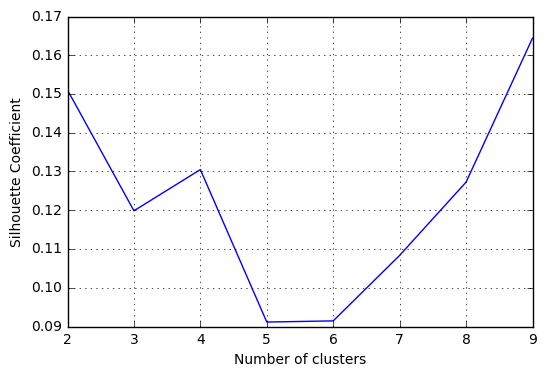

In [115]:
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(count_df)
    scores.append(metrics.silhouette_score(count_df, km.labels_))
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [117]:
km = KMeans(n_clusters=9, random_state=1)
km.fit(tfidf_df)
print metrics.silhouette_score(tfidf_df, km.labels_)
km.labels_

0.104859607912


array([6, 8, 8, 8, 6, 5, 5, 5, 8, 4, 8, 0, 5, 5, 5, 5, 5, 5, 6, 3, 7, 6, 6,
       5, 6, 8, 8, 8, 5, 6, 6, 6, 6, 0, 5, 5, 5, 5, 5, 5, 4, 8, 8, 8, 5, 5,
       5, 5, 5, 0, 6, 6, 5, 4, 4, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5,
       6, 5, 4, 4, 4, 6, 0, 0, 5, 5, 5, 5, 5, 4, 4, 4, 5, 0, 0, 3, 3, 3, 5,
       0, 6, 6, 5, 8, 8, 8, 5, 1, 7, 1, 1, 1, 2, 2, 5, 5, 5, 5, 5, 5, 5, 1,
       1, 1, 1, 1, 5, 2, 7, 5, 5, 2, 1, 1, 1, 1, 1, 1, 5, 2, 2, 7, 7, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2,
       2, 2, 5, 5, 2, 2, 2, 7, 7, 0, 5, 5, 5, 5, 5, 6, 8, 8, 8, 6, 5, 5, 5,
       8, 4, 8, 0, 5, 5, 5, 5, 5, 5, 6, 3, 7, 6, 6, 5, 6, 8, 8, 8, 5, 6, 6,
       6, 6, 0, 5, 5, 5, 5, 5, 5, 4, 8, 8, 8, 5, 5, 5, 5, 5, 0, 6, 6, 5, 4,
       4, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 6, 5, 4, 4, 4, 6, 0, 0,
       5, 5, 5, 5, 5, 4, 4, 4, 5, 0, 0, 3, 3, 3, 5, 0, 6, 6, 5, 8, 8, 8, 5,
       1, 7, 1, 1, 1, 2, 2, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 5, 2, 7, 5,
       5, 2,

In [118]:
music_df['cluster'] = km.labels_
music_df.head()

,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,sentiment,word_count,cluster
0,2016-12-02 02:03:12,Featured Artist #torilynn #top40 #music #twt24...,0,False,en,None,0,False,None,0.000000,113,6
1,2016-12-02 02:01:26,S/T by The Smiths https://t.co/eAQ8dYK6sj #Mus...,0,False,en,None,0,False,None,-0.100000,105,8
2,2016-12-02 02:01:26,Once Upon a Time in the West by Ennio #Morrico...,0,False,en,None,0,False,None,0.000000,111,8
3,2016-12-02 02:01:26,Miles Davis At Carnegie Hall by Miles Davis ht...,0,False,en,None,0,False,None,0.000000,110,8
4,2016-12-02 01:44:36,Check out 🎤 https://t.co/Mctky0EXrl ☜ New rel...,0,False,en,None,0,False,None,0.136364,138,6


In [177]:
# 7 Explore the clusters
# What is interesting? Surprising? Can you draw any inferences about each cluster?
# Was this enough to find any relevant topics about music tweets?
# Can you give any of the clusters name?

# There doesn't seem to be any coherent categorization/grouping of the data, at least
# without the ability to better find an optimal k

In [ ]:
# 8. use LSA to obtain better topic clusters. Can you give any of the clusters name?
# Make a boxplot of sentiment for each candidate by the "democrat" column

In [120]:
other_tweets = []

In [127]:
# 9. Think of 3 more hashtags you wish to explore (all of them should be about the same thing)
# and make a dataframe the same way we did in the previous steps
other_tweets.append(api.search(q='#republican', count=100, geocode="37.781157,-122.398720,10mi")+\
api.search(q='#democrat', count=100, geocode="37.781157,-122.398720,10mi")+\
api.search(q='#president', count=100, geocode="37.781157,-122.398720,10mi"))

In [128]:
other = [item for sublist in other_tweets for item in sublist]

In [129]:
other_tweets = other

In [130]:
len(other_tweets)

938

In [131]:
other_tweets = parse_status_objects(other_tweets)
cols = ['date', 'text', 'favorite_count', 'favorited', 'language', 'geocode', 'retweet count', 'retweeted', 'coordinates']
politics_df = pd.DataFrame(other_tweets, columns=cols)

In [132]:
# 10. Use whatever clustering method (DBSCAN, LSA, KMEANS) you deem best (silhouette coeff?) and make a supervised model out of it
# IE try to predict the clusters you obtained by using the features
# Note clustering does not HAVE to include text if you do not want it to in that case LSA won't help
vect = CountVectorizer()
count_df = pd.DataFrame(vect.fit_transform(politics_df['text']).toarray(), columns=vect.get_feature_names())
count_df.head()

,000,001,002,003,004,005,006,007,008,009,...,xe1nfrzovi,xmmlh8ifx5,y3tmy9ns3y,yajfv1dmwx,years,yosysljfbc,younger,your,youtube,zxehoatpk3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


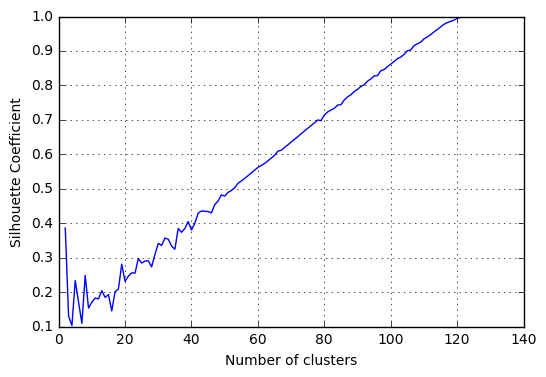

In [133]:
k_range = range(2, 122)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(count_df)
    scores.append(metrics.silhouette_score(count_df, km.labels_))
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

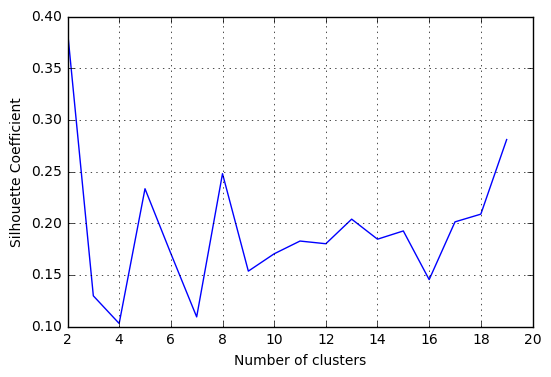

In [134]:
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(count_df)
    scores.append(metrics.silhouette_score(count_df, km.labels_))
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [136]:
km = KMeans(n_clusters=2, random_state=1)
km.fit(count_df)
print metrics.silhouette_score(count_df, km.labels_)
politics_df['clusterA'] = km.labels_
politics_df.head()

0.386177182646


,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,clusterA
0,2016-12-02 01:51:04,RT @JacloPac: The lack of growth over the last...,0,False,en,None,11,False,None,1
1,2016-12-01 23:26:25,RT @JacloPac: The lack of growth over the last...,0,False,en,None,11,False,None,1
2,2016-12-01 22:44:01,RT @JacloPac: The lack of growth over the last...,0,False,en,None,11,False,None,1
3,2016-12-01 22:02:30,RT @JacloPac: The lack of growth over the last...,0,False,en,None,11,False,None,1
4,2016-12-01 20:28:59,@business #cronycapitalism and #republican #hy...,0,False,en,None,0,False,None,0


In [137]:
politics_df.groupby('clusterA').count()

,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates
clusterA,,,,,,,,,
0,854,854,854,854,854,7,854,854,7
1,84,84,84,84,84,0,84,84,0


In [138]:
km = KMeans(n_clusters=5, random_state=1)
km.fit(count_df)
print metrics.silhouette_score(count_df, km.labels_)
politics_df['clusterB'] = km.labels_
politics_df.head()

0.23331959556


,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,clusterA,clusterB
0,2016-12-02 01:51:04,RT @JacloPac: The lack of growth over the last...,0,False,en,None,11,False,None,1,1
1,2016-12-01 23:26:25,RT @JacloPac: The lack of growth over the last...,0,False,en,None,11,False,None,1,1
2,2016-12-01 22:44:01,RT @JacloPac: The lack of growth over the last...,0,False,en,None,11,False,None,1,1
3,2016-12-01 22:02:30,RT @JacloPac: The lack of growth over the last...,0,False,en,None,11,False,None,1,1
4,2016-12-01 20:28:59,@business #cronycapitalism and #republican #hy...,0,False,en,None,0,False,None,0,2


In [139]:
politics_df.groupby('clusterB').count()

,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,clusterA
clusterB,,,,,,,,,,
0,14,14,14,14,14,0,14,14,0,14
1,84,84,84,84,84,0,84,84,0,84
2,280,280,280,280,280,7,280,280,7,280
3,539,539,539,539,539,0,539,539,0,539
4,21,21,21,21,21,0,21,21,0,21


In [140]:
politics_df.groupby('clusterB')['retweeted'].count()

clusterB
0     14
1     84
2    280
3    539
4     21
Name: retweeted, dtype: int64

In [ ]:
# 11. cross validate and create the best possible supervised model for your new clusters on your new daa
# You may use the music data if you wish